In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import random

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 

X_train = X_train / 255.0 
X_test = X_test / 255.0 

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation= "softmax"))

model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [11]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)
test_loss, test_acc = model.evaluate(X_test, y_test) 

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9510 - loss: 0.1709 - val_accuracy: 0.9763 - val_loss: 0.0726
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9642 - loss: 0.1257 - val_accuracy: 0.9765 - val_loss: 0.0799
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9723 - loss: 0.0994 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0853 - val_accuracy: 0.9833 - val_loss: 0.0622
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9778 - loss: 0.0759 - val_accuracy: 0.9853 - val_loss: 0.0532
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0626 - val_accuracy: 0.9862 - val_loss: 0.0511
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9862 - val_loss: 0.0508
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9850 - loss: 0.0512 - 

Text(0, 0.5, 'accuracy')

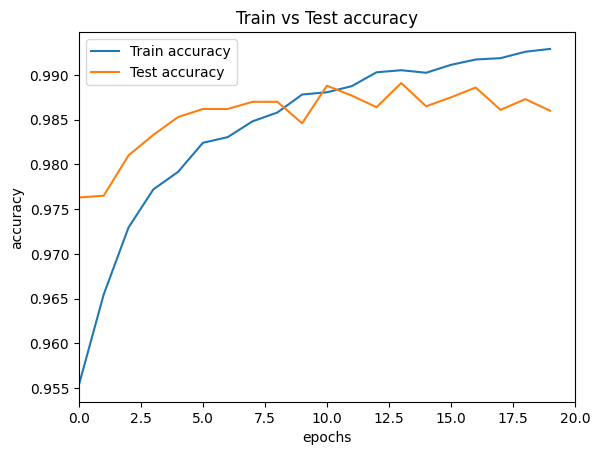

In [21]:
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label ="Test accuracy")
plt.xlim (0, 20)
plt.title("Train vs Test accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The model predicted: 7


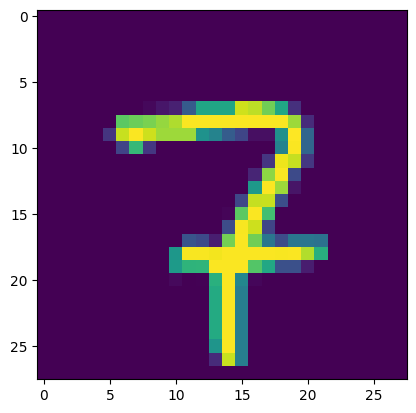

In [ ]:
index = random.randint(0, len(y_test))
plt.imshow(X_test[index, : ])
y_predict = model.predict(X_test[index, :].reshape(-1, 28, 28, 1))
print("The model predicted:",np.argmax(y_predict))